In [38]:
import copy
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [39]:
def gen_array(size = 100):
    A = []
    for _ in range(size):
        A.append(random.randint(0, size))
    return A

In [40]:
def brute_force(A):
    left = 0
    right = 0
    max_sum = 0
    
    for i in range(len(A)):
        s = A[i]
        for j in range(i + 1, len(A), 1):
            s += A[j]  
            if max_sum < s:
                left = i
                right = j
                max_sum = s
                
    return left, right, max_sum
            
        
        

In [41]:
def find_max_crossing_subarray(A, low, mid, high):
    left_sum = float("-inf")
    summarize = 0

    for i in range(mid, low - 1, -1): # down to
        summarize += A[i]

        if summarize > left_sum:
            left_sum = summarize
            max_left = i

    right_sum = float("-inf")
    summarize = 0

    for j in range(mid + 1, high + 1, 1):
        summarize += A[j]

        if summarize > right_sum:
            right_sum = summarize
            max_right = j

    return max_left, max_right, left_sum + right_sum


def find_max_subarray(A, low, high):
    if high == low:  # only one element
        return low, high, A[low]
    else:
        mid = (low + high) // 2

        left_low, left_high, left_sum = find_max_subarray(A, low, mid)
        right_low, right_high, right_sum = find_max_subarray(A, mid + 1, high)
        cross_low, cross_high, cross_sum = find_max_crossing_subarray(A, low, mid, high)

        if left_sum >= right_sum and left_sum >= cross_sum:
            return left_low, left_high, left_sum
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return right_low, right_high, right_sum
        else:
            return cross_low, cross_high, cross_sum

In [42]:
a = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print(find_max_subarray(a, 0, len(a)-1))
brute_force(a)

(7, 10, 43)


(7, 10, 43)

In [45]:
count = 4
sizes = np.logspace(start=1, stop=count, num=count, base=10)
brute_times = []
devide_times = []

for s in sizes:
    arr = gen_array(int(s))
    start = time.time()
    brute_force(arr)
    end = time.time()
    brute_times.append(end - start)
    
    start = time.time()
    find_max_subarray(arr, 0, len(arr)-1)
    end = time.time()
    devide_times.append(end - start)
    

df = pd.DataFrame({
    'brute_force[sec]' : brute_times,
    'devide_and_conquer[sec]' : devide_times
}
)
df

,brute_force[sec],devide_and_conquer[sec]
0,0.000017,0.000038
1,0.000726,0.000378
2,0.079661,0.005784
3,4.318913,0.037074


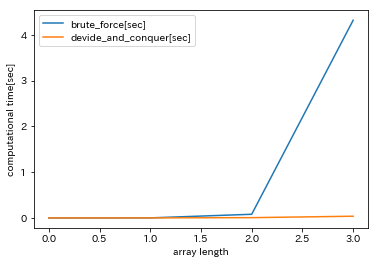

In [46]:
df.plot(kind='line')

plt.xlabel('array length')
plt.ylabel('computational time[sec]')
plt.legend(loc='best')
plt.show()